In [ ]:
!mkdir ../checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

In [2]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [5]:
config_file = '../../model/segformer.py'
checkpoint_file = '../../model/ST_seg.pth'

In [6]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cpu')

Loads checkpoint by local backend from path: ../../model/ST_seg.pth


/root/docker-workspace/ADD2nd/code/ADD2nd/semantic_segmentation/library/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [7]:
# test a single image
img = 'demo.png'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


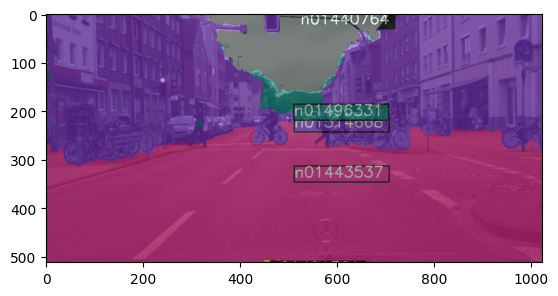

In [8]:
# show the results
vis_result = show_result_pyplot(model, img, result, show=False)
plt.imshow(vis_result)